The repository contains the following packages: config, data, models

__1-__ The __config__ package contains configs of the models and also settings of the project.


__2-__ The __data__ package stores and loads the data needed for the models. It has datasets and data_loaders sub-packages.
The datasets sub-package stores raw data samples; one of our used datasets is CAVE which you can find its full data here: https://www1.cs.columbia.edu/CAVE/databases/multispectral/

In data_loader sub-package, we prepare data samples needed for the models. In reformat_cave_data.py file, we change the CAVE data format to use them for our models. Also, in simulate_data.py we select some random patches from both RGB and HS images to train our models and then simulate functionality of the spectrophotometer.


__3-__ The __models__ package contains our implemented models. At regression.py file, we have implemented a regression model to reconstruct HS images from the corresponding RGB images.


We evaluate our models by using RMSE.

At the first we should load the data and select some random patches to train the model. The number of patches is:

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from config import PATCHES_NUM

patches_num = PATCHES_NUM
print(patches_num)

200


In [27]:
import os

from config import PATCHES_SIZE, DATASETS_DIR
from data.data_loader.simulate_data import load_data, random_patches


folder_path = os.path.join(DATASETS_DIR, 'CAVE', 'balloons_ms')

rgb_img, hs_img = load_data(folder_path)
rgb_patches, hs_patches, patches = random_patches(rgb_img, hs_img, patches_num, PATCHES_SIZE)

Now it's time to simulate functionality of the spectrophotometer.

In [28]:
from data.data_loader.simulate_data import simulate_spectrophotometer

avg_rgb_patches = simulate_spectrophotometer(rgb_patches)
avg_hs_patches = simulate_spectrophotometer(hs_patches)

Then we should split the data to test and train sets with the TRAIN_RATIO of:

In [29]:
from config import TRAIN_RATIO

print(TRAIN_RATIO)

0.8


In [30]:
train_samples = int(TRAIN_RATIO * patches_num)
train_rgb, test_rgb = avg_rgb_patches[:train_samples], avg_rgb_patches[train_samples:]
train_hs, test_hs = avg_hs_patches[:train_samples], avg_hs_patches[train_samples:]

Finally we train the regresson model.

In [31]:
from models.regression import Regression

regresstion = Regression(train_rgb, train_hs)
regresstion.train()
predictions = regresstion.model.predict(test_rgb)

The RMSE score is as follows.

In [32]:
from main import rmse

print(rmse(test_hs, predictions))

1091.0447679820627


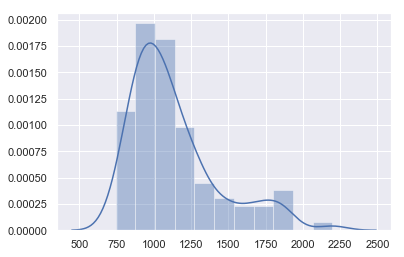

In [33]:
import seaborn as sns
from main import run


rmses = []
for i in range(100):
    rmses.append(run(patches_num))
    
sns.set(color_codes=True)
sns.distplot(rmses)